# Classification Algorithms and Model Evaluation

In this notebook, we will cover:

* Logistic Regression
* Confusion Matrix
* Precision, Recall, Accuracy, F1 Score
* ROC AUC Curve
* Deciding Binary Classifier threshold

Importing all necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Task 1: Load Data from 'titanic_clean.csv'

In [2]:
# write code here
data = pd.read_csv('titanic_clean.csv')
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,1,0,3,male,1,0,S,Mr,couple,0-10,16-32
1,2,1,1,female,1,0,C,Mrs,couple,70-100,32-48
2,3,1,3,female,0,0,S,Miss,solo,0-10,16-32
3,4,1,1,female,1,0,S,Mrs,couple,40-70,32-48
4,138,0,1,male,1,0,S,Mr,couple,40-70,32-48


### One Hot encoding for categorical varaibles

In [3]:
df_OneHot = pd.get_dummies(
    df, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'GrpSize', 'FareCat', 'AgeCat'])
df_OneHot.head()

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,138,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [4]:
df = df_OneHot.copy()

### Task 2: Create Independent and Dependent Variables

In [5]:
# write code here
X = df.drop(['PassengerId', 'Survived'], axis=1)
Y = df['Survived']

### Task 3: Train Test n Split the data

In [6]:
# Import the library
from sklearn.model_selection import train_test_split

In [7]:
# Write the code here
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.3, random_state=25, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(623, 30) (623,)
(268, 30) (268,)


In [8]:
xtrain.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
707,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
246,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
624,1,1,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
96,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
576,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [9]:
ytrain.head()

707    0
246    0
624    1
96     1
576    0
Name: Survived, dtype: int64

# 1. Logistic Regression

### Creating Model & Training

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr_model = LogisticRegression(random_state=25)

In [12]:
lr_model.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=25, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluation 

In [13]:
pred = lr_model.predict(xtest)

In [14]:
pred[0:9]

array([0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

Predicting prabability of **0** and **1**

In [15]:
pred_prb = lr_model.predict_proba(xtest)

In [16]:
pred_prb[:,1]

array([4.53835695e-02, 7.11057399e-02, 9.91401146e-02, 7.11057399e-02,
       7.11057399e-02, 7.34159592e-01, 7.11057399e-02, 8.26362752e-01,
       4.53835695e-02, 7.11057399e-02, 8.99128650e-01, 3.86325345e-01,
       7.11057399e-02, 7.11057399e-02, 4.63889285e-01, 5.73899154e-01,
       2.01715768e-01, 3.89548282e-01, 2.83829609e-01, 8.59924778e-01,
       3.83298452e-01, 5.52110629e-01, 8.06482853e-03, 7.11057399e-02,
       9.37888457e-01, 9.71989007e-01, 1.26238419e-01, 5.21030362e-01,
       3.89548282e-01, 8.04527796e-01, 1.26238419e-01, 7.15160680e-01,
       7.79041775e-01, 4.53835695e-02, 1.54320593e-01, 8.53882801e-01,
       8.25835752e-01, 4.08713945e-01, 1.50525815e-01, 5.32199418e-01,
       6.69247825e-02, 7.38789035e-02, 1.26238419e-01, 6.84175592e-01,
       1.66934121e-01, 7.11057399e-02, 8.77762574e-01, 1.66934121e-01,
       1.10676837e-01, 7.99452416e-01, 3.61561065e-01, 1.26238419e-01,
       7.38326498e-01, 1.29726373e-01, 7.80605251e-01, 8.80308799e-02,
      

First value in Numpy array is probability of **0** and second is probability of **1**

Only predicting and extracting probability values of **1**

In [17]:
lr_pred_prb = lr_model.predict_proba(xtest)[:, 1]

### Comparison of Predicted and Actual

In [19]:
xt = xtest.copy()
xt['pred'] = pred
xt['pred_probability'] = lr_pred_prb
xt['actual'] = ytest
xt.head(20)

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+,pred,pred_probability,actual
760,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0.045384,0
773,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071106,0
266,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0.099140,0
507,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071106,1
524,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071106,0
169,0,1,0,1,0,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0.734160,1
189,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071106,0
360,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0.826363,1
691,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0.045384,0
335,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071106,0


### Confusion Matrix Play ground

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(ytest, pred)

array([[150,  19],
       [ 29,  70]], dtype=int64)

In [22]:
confusion_matrix(ytest, pred).ravel()

array([150,  19,  29,  70], dtype=int64)

In [23]:
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix = pd.DataFrame({"pred_Survived": [tp, fp], "pred_Not Survived": [
                           fn, tn]}, index=["Survived", "Not Survived"])
conf_matrix

,pred_Survived,pred_Not Survived
Survived,70,29
Not Survived,19,150


### Accuracy

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy = (tp + tn) / (tp + fp + tn + fn)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8208955223880597


In [26]:
accuracy_lr = accuracy_score(ytest, pred)
print("Accuracy by built-in function: {}".format(accuracy_lr))

Accuracy by built-in function: 0.8208955223880597


### Precision

In [27]:
from sklearn.metrics import precision_score

In [28]:
precision_1 = tp / (tp + fp)
print("Precision for 1: {}".format(precision_1))
precision_0 = tn / (tn + fn)
print("Precision for 0: {}".format(precision_0))

Precision for 1: 0.7865168539325843
Precision for 0: 0.8379888268156425


In [29]:
precision_lr = precision_score(ytest, pred, pos_label=0)
print("Precision by built-in function: {}".format(precision_lr))

Precision by built-in function: 0.8379888268156425


### Recall

In [30]:
from sklearn.metrics import recall_score

In [31]:
recall_1 = tp / (tp + fn)
print("Recall for 1: {}".format(recall_1))
recall_0 = tn / (tn + fp)
print("Recall for 0: {}".format(recall_0))

Recall for 1: 0.7070707070707071
Recall for 0: 0.8875739644970414


In [32]:
recall_lr = recall_score(ytest, pred)
print("Recall by built-in function: {}".format(recall_lr))

Recall by built-in function: 0.7070707070707071


### F1 Score

In [33]:
from sklearn.metrics import f1_score

In [34]:
f1_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)
print("F1 Score for 1: {}".format(f1_1))
f1_0 = (2 * precision_0 * recall_0) / (precision_0 + recall_0)
print("F1 Score for 0: {}".format(f1_0))

F1 Score for 1: 0.7446808510638298
F1 Score for 0: 0.8620689655172413


In [35]:
f1_lr = f1_score(ytest, pred)
print("F1 Score by built-in function: {}".format(f1_lr))

F1 Score by built-in function: 0.7446808510638298


### Classification Report

In [36]:
from sklearn.metrics import classification_report

In [37]:
# get report of precision recall and f1 score
print(classification_report(ytest, pred))
# macro avg

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       169
           1       0.79      0.71      0.74        99

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [38]:
import helper_confusion_matrix as helper
helper.conf_matrix(ytest, lr_pred_prb)

              pred_Survived  pred_Not Survived
Survived                 70                 29
Not Survived             19                150
Accuracy: 82.090
Precision : 78.652
Recall: 70.707
F1 Score : 74.468
TPR: 70.707  FPR: 11.243


### ROC AUC Curve

_Receiver Operating Characteristic_ & _Area Under Curve_

In [39]:
tpr = recall_lr
fpr = fp / (fp + tn)

In [40]:
tpr, fpr

(0.7070707070707071, 0.11242603550295859)

In [41]:
fpr = 1 - recall_0
tpr, fpr

(0.7070707070707071, 0.1124260355029586)

Defining function to plot ROC AUC Curve

In [42]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

In [43]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

Getting TPR, FPR values for each threshold on ROC AUC Curve

In [45]:
fpr, tpr, threshold= roc_curve(ytest, lr_pred_prb)

Calculating AUC score from ytest and predicted probabilities

In [46]:
auc_lr = roc_auc_score(ytest, lr_pred_prb)
auc_lr

0.8313908313908313

Plotting AUC ROC Curve

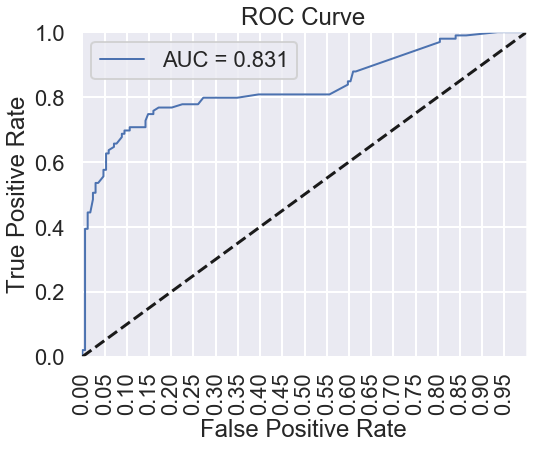

In [47]:
sns.set_context('poster')
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_lr)

## Model Complexity

In [51]:
from sklearn.preprocessing import PolynomialFeatures
acc_train = []
acc_test = []

for i in range(1, 6):
    poly_reg = PolynomialFeatures(degree=i)

    X_tr_poly, X_tst_poly = poly_reg.fit_transform(
        xtrain), poly_reg.fit_transform(xtest)

    lr_poly = LogisticRegression(random_state=25)
    lr_poly.fit(X_tr_poly, ytrain)

    tr_predicted, tst_predict = lr_poly.predict(X_tr_poly), lr_poly.predict(X_tst_poly)

    acc_train.append(accuracy_score(ytrain, tr_predicted))
    acc_test.append(accuracy_score(ytest, tst_predict))

C:\Users\Muddassir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Muddassir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

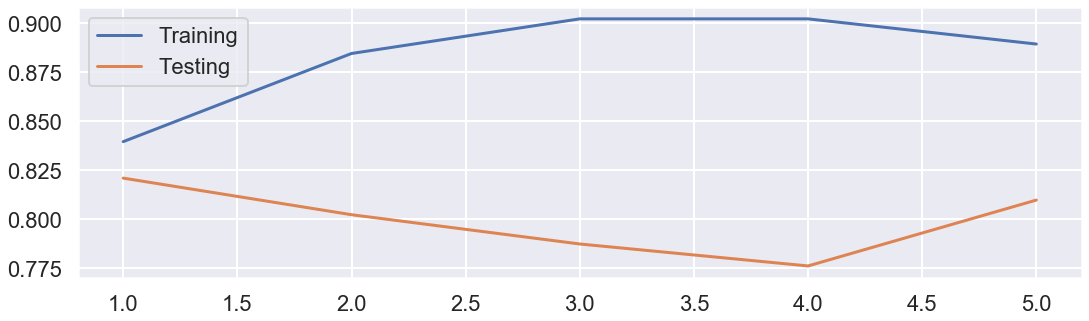

In [52]:
plt.figure(figsize=(18, 5))
sns.set_context('poster')

sns.lineplot(x=list(range(1, 6)), y=acc_train, label='Training')

sns.lineplot(x=list(range(1, 6)), y=acc_test, label='Testing')